In [1]:
from sklearn.datasets import load_iris, load_boston
import pandas as pd

import xgboost as xgb
import xgbfir

import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'xgboost'

Wczytajmy przykładowy zbiór danych (po to, żeby mieć jakiś sensowny zbiór z cechami).

In [ ]:
boston = load_boston()
print(boston.DESCR)

Zbudujmy prosty model XGBoost.

In [ ]:
xgb_rmodel = xgb.XGBRegressor().fit(boston['data'], boston['target'])

## Feature importance
Algorytmy drzewiaste dają możliwość zobaczenia ważności cech. Warto również rozumieć, jak to działa pod spodem.

Są trzy strategie, jak można wyliczyć ważność:
- **frequence** (jak często cecha pojawiła się w podziałach)
- **cover** (jak duży wpływ ma, czyli na ile danych wpłynęła: na 1% czy 99%)
- **gain** (na ile cecha pomogła zmniejszyć entropię zbioru, dzieląc go na 2 podzbiory)

Zwykle (domyślnie) bierze się pod uwagę `frequence`, ale taka strategia może być słaba. Pomyśl o tym  w ten sposób. Mamy drzewo i następuje podział pod wpływem danej cechy, ale nie wpływa to na zmniejszenie entropii. Wartość tej cechy wg `frequence` wzrośnie, natomiast wg `gain` nie. Dlatego jest dość istotna różnica pomiędzy podziałem, po którym prawie nic się nie zmieniło i takim, po którym entropia (mieszanka/nieczystość) zmalała do zera.


`xbgfir` to narzędzie, które wyciąga informacje z "bebechów" XGBoost i zapisuje je w tabelce (pliku excel).

In [ ]:
xgbfir.saveXgbFI(xgb_rmodel, feature_names=boston.feature_names, OutputXlsxFile='bost_fi.xlsx')

Poniżej są przedstawione wzory, jak to się liczy.

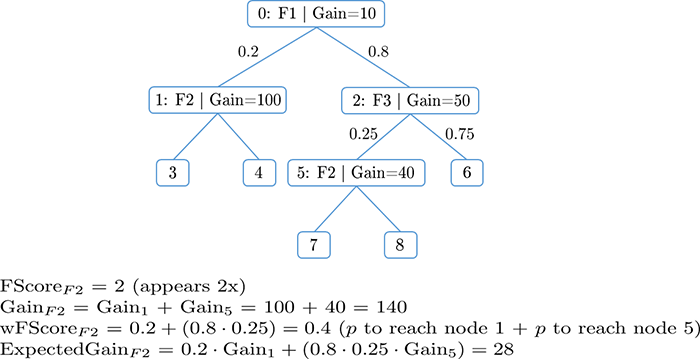

`xgbfir` daje znacznie więcej informacji niż zwykły `feature importances`.  Zwróć uwagę na tabelkę
poniżej, gdzie jest kilka rankingów:
1. Gain Rank
2. FScore Rank
3. Avg wFScore Rank
4. Avg Gain Rank
5. Expected Gain Rank
6. Average Rank

W zależności od rankingu są różne wyniki (czasem różnią się dość istotnie). 
Proszę przyjrzyj się dokładniej tabelce.

## Interaction Depth 0
Na początek tylko jedna zmienna (cecha).

In [ ]:
pd.read_excel('bost_fi.xlsx', 'Interaction Depth 0')

Przed tym patrzyliśmy na korelację (liniową), żeby złapać zależności pomiędzy cechami. Teraz możesz używać XGBoost jako narzędzia, które wykrywa nieliniowe zależności, a `xgbfir` jako narzędzia, które wyciąga te informacje i układa w tabelkę. Popatrzmy na interakcję dwóch, a potem trzech zmiennych.

## Interaction Depth 1
Zależność pomiędzy dwoma cechami.

In [ ]:
pd.read_excel('bost_fi.xlsx', 'Interaction Depth 1')

## Interaction Depth 2
Zależność pomiędzy trzema cechami.

In [ ]:
pd.read_excel('bost_fi.xlsx', 'Interaction Depth 2')

Zwróć uwagę na kombinację cech, takich jak:
- `DIS|LSTAT|RM`
- `LSTAT|RM|RM`
- `LSTAT|LSTAT|NOX`
- `B|LSTAT|LSTAT`
- `CRIM|LSTAT|RM`

W praktyce to oznacza, że warto przyjrzeć się tym zmiennym, w szczególności relacjom pomiędzy nimi.